# Project 2 - Healthcare

# Data Exploration:

Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

Glucose

BloodPressure

SkinThickness

Insulin

BMI

In [1]:
# importing the required libraries 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# loading the data set from the system path 
diabetesdata=pd.read_csv("D:\\Data Science\\Healthcare - Diabetes\\health care diabetes.csv")

In [3]:
# viewing the all columns and first rows of data with head function
diabetesdata.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Perform descriptive analysis
diabetesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetesdata.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetesdata.isnull().any() # not showing any missing values though 0 is not valid data for many labes such as 
                            # glucose, blood pressure so, imputing with the median and mean

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [7]:
# Finding the 0 values in the Glucose column
diabetesdata[diabetesdata['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [8]:
# Replacing the 0 glucose value with the median (as data is skewed)

diabetesdata['Glucose']=diabetesdata['Glucose'].replace(0,diabetesdata['Glucose'].median()) 

In [9]:
#Finding the 0 values in BloodPressure
diabetesdata[diabetesdata['BloodPressure']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [10]:
diabetesdata['BloodPressure']= diabetesdata['BloodPressure'].replace(0,diabetesdata['BloodPressure'].median())

In [11]:
diabetesdata.head(16) #sucessfully replace the median (as data is not normally distributed) value of 72

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,72,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [12]:
#Finding the 0 values in SkinThickness
diabetesdata[diabetesdata['SkinThickness']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,72,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


In [13]:
diabetesdata['SkinThickness']=diabetesdata['SkinThickness'].replace(0,diabetesdata['SkinThickness'].median())

In [14]:
diabetesdata.head() # here can see the 0 value data is replace with the median 23

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,23,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
# Finding the 0 values in Insulin
diabetesdata[diabetesdata['Insulin']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,23,0,23.3,0.672,32,1
5,5,116,74,23,0,25.6,0.201,30,0
7,10,115,72,23,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,23,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,23,0,30.1,0.349,47,1


In [16]:
diabetesdata['Insulin']=diabetesdata['Insulin'].replace(0,diabetesdata['Insulin'].median())

In [17]:
diabetesdata.head() # 0 values replaced with the median (as data is skewed) value of 30.5 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [18]:
# Finding 0 values in BMI
diabetesdata[diabetesdata['BMI']==0] 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,23,30.5,0.0,0.232,54,1
49,7,105,72,23,30.5,0.0,0.305,24,0
60,2,84,72,23,30.5,0.0,0.304,21,0
81,2,74,72,23,30.5,0.0,0.102,22,0
145,0,102,75,23,30.5,0.0,0.572,21,0
371,0,118,64,23,89.0,0.0,1.731,21,0
426,0,94,72,23,30.5,0.0,0.256,25,0
494,3,80,72,23,30.5,0.0,0.174,22,0
522,6,114,72,23,30.5,0.0,0.189,26,0
684,5,136,82,23,30.5,0.0,0.640,69,0


In [19]:
diabetesdata['BMI']=diabetesdata['BMI'].replace(0,diabetesdata['BMI'].mean())

In [20]:
diabetesdata.head(10) # replaced the 0 value with mean (as BMI data is normally distributed) 31.99 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.600000,0.627,50,1
1,1,85,66,29,30.5,26.600000,0.351,31,0
2,8,183,64,23,30.5,23.300000,0.672,32,1
3,1,89,66,23,94.0,28.100000,0.167,21,0
4,0,137,40,35,168.0,43.100000,2.288,33,1
5,5,116,74,23,30.5,25.600000,0.201,30,0
6,3,78,50,32,88.0,31.000000,0.248,26,1
7,10,115,72,23,30.5,35.300000,0.134,29,0
8,2,197,70,45,543.0,30.500000,0.158,53,1
9,8,125,96,23,30.5,31.992578,0.232,54,1


# Visually explore these variables using histograms. Treat the missing values accordingly.

In [21]:
diabetesdata['Glucose'].value_counts()

99     17
100    17
117    16
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 135, dtype: int64

(array([  4.,  19.,  87., 149., 166., 125.,  88.,  54.,  44.,  32.]),
 array([ 44. ,  59.5,  75. ,  90.5, 106. , 121.5, 137. , 152.5, 168. ,
        183.5, 199. ]),
 <BarContainer object of 10 artists>)

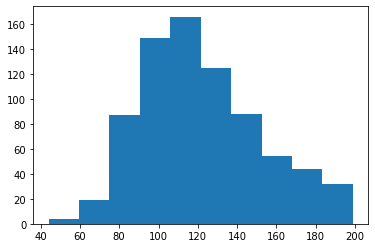

In [22]:
n_bins = 10
plt.hist(diabetesdata['Glucose'], bins = n_bins) # plot depicts the normally distributed data

In [23]:
diabetesdata['BloodPressure'].value_counts()

72     79
70     57
74     52
78     45
68     45
64     43
80     40
76     39
60     37
62     34
66     30
82     30
88     25
84     23
90     22
58     21
86     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
94      6
85      6
48      5
96      4
44      4
98      3
100     3
106     3
110     3
55      2
30      2
104     2
46      2
108     2
61      1
38      1
24      1
122     1
102     1
95      1
40      1
114     1
Name: BloodPressure, dtype: int64

(array([  3.,   2.,  35., 118., 261., 214., 105.,  18.,  10.,   2.]),
 array([ 24. ,  33.8,  43.6,  53.4,  63.2,  73. ,  82.8,  92.6, 102.4,
        112.2, 122. ]),
 <BarContainer object of 10 artists>)

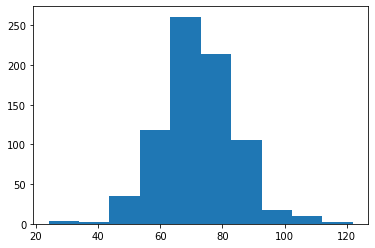

In [24]:
plt.hist(diabetesdata['BloodPressure'], bins = n_bins) # plot depicts the normally distributed data

In [25]:
diabetesdata['SkinThickness'].value_counts()

23    249
32     31
30     27
27     23
28     20
33     20
18     20
31     19
19     18
39     18
29     17
25     16
37     16
40     16
22     16
26     16
35     15
41     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
45      6
16      6
43      6
11      6
14      6
44      5
10      5
47      4
48      4
50      3
49      3
54      2
7       2
52      2
8       2
56      1
51      1
60      1
63      1
99      1
Name: SkinThickness, dtype: int64

(array([ 59., 368., 181., 118.,  36.,   4.,   1.,   0.,   0.,   1.]),
 array([ 7. , 16.2, 25.4, 34.6, 43.8, 53. , 62.2, 71.4, 80.6, 89.8, 99. ]),
 <BarContainer object of 10 artists>)

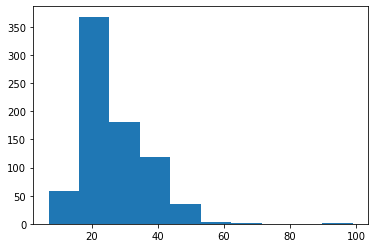

In [26]:
plt.hist(diabetesdata['SkinThickness'], bins = n_bins) # plot depicts the right skweness can correct with the log and or sqrt transformation

In [27]:
diabetesdata['SkinThickness']=np.log(diabetesdata['SkinThickness']) # corrected with the log transformation

(array([  4.,  11.,  38.,  71., 319., 165., 123.,  34.,   2.,   1.]),
 array([1.94591015, 2.21083112, 2.47575209, 2.74067306, 3.00559403,
        3.270515  , 3.53543597, 3.80035694, 4.06527791, 4.33019888,
        4.59511985]),
 <BarContainer object of 10 artists>)

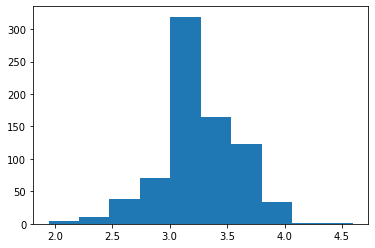

In [28]:
plt.hist(diabetesdata['SkinThickness'], bins = n_bins)

In [29]:
diabetesdata['Insulin'].value_counts().head(10)

30.5     374
105.0     11
130.0      9
140.0      9
120.0      8
94.0       7
180.0      7
100.0      7
135.0      6
115.0      6
Name: Insulin, dtype: int64

(array([516., 143.,  55.,  29.,   7.,  10.,   4.,   1.,   2.,   1.]),
 array([ 14. ,  97.2, 180.4, 263.6, 346.8, 430. , 513.2, 596.4, 679.6,
        762.8, 846. ]),
 <BarContainer object of 10 artists>)

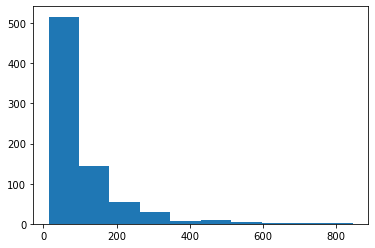

In [30]:
plt.hist(diabetesdata['Insulin'], bins = n_bins)  # plot depicts the right skweness can correct with the log and or sqrt transformation

In [31]:
diabetesdata['Insulin']=np.sqrt(diabetesdata['Insulin']) #corrected with the square root transformation

(array([391.,  84., 102.,  97.,  42.,  27.,   8.,  12.,   3.,   2.]),
 array([ 3.74165739,  6.27609956,  8.81054174, 11.34498391, 13.87942609,
        16.41386827, 18.94831044, 21.48275262, 24.01719479, 26.55163697,
        29.08607914]),
 <BarContainer object of 10 artists>)

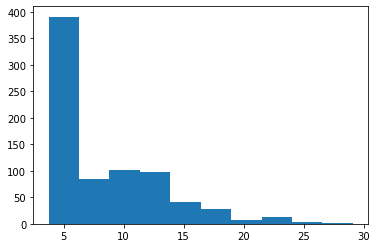

In [32]:
plt.hist(diabetesdata['Insulin'], bins = n_bins)

In [33]:
diabetesdata['BMI'].value_counts().head(10)

32.000000    13
31.600000    12
31.200000    12
31.992578    11
32.400000    10
33.300000    10
30.100000     9
32.800000     9
32.900000     9
30.800000     9
Name: BMI, dtype: int64

(array([ 52., 161., 207., 193.,  91.,  48.,  10.,   4.,   1.,   1.]),
 array([18.2 , 23.09, 27.98, 32.87, 37.76, 42.65, 47.54, 52.43, 57.32,
        62.21, 67.1 ]),
 <BarContainer object of 10 artists>)

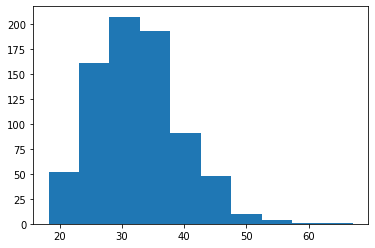

In [34]:
plt.hist(diabetesdata['BMI'], bins = n_bins) #  plot shows the right skewness

In [35]:
diabetesdata['BMI']=np.log(diabetesdata['BMI']) # corrected with the log transformation

(array([ 17.,  51., 104., 145., 203., 147.,  70.,  23.,   6.,   2.]),
 array([2.90142159, 3.03189784, 3.16237408, 3.29285033, 3.42332657,
        3.55380282, 3.68427906, 3.81475531, 3.94523155, 4.0757078 ,
        4.20618404]),
 <BarContainer object of 10 artists>)

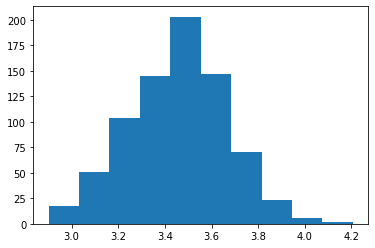

In [36]:
plt.hist(diabetesdata['BMI'], bins = n_bins)

# There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

In [37]:
diabetesdata['Glucose'].value_counts() # exploring the how many types of different values data has
                                # already showed aboved but printed again as some of the data scale change due to transformation

99     17
100    17
117    16
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 135, dtype: int64

In [38]:
diabetesdata['BloodPressure'].value_counts().head()

72    79
70    57
74    52
78    45
68    45
Name: BloodPressure, dtype: int64

In [39]:
diabetesdata['SkinThickness'].value_counts().head()

3.135494    249
3.465736     31
3.401197     27
3.295837     23
3.332205     20
Name: SkinThickness, dtype: int64

In [40]:
diabetesdata['Insulin'].value_counts()

5.522681     374
10.246951     11
11.401754      9
11.832160      9
10.954451      8
            ... 
8.544004       1
13.076697      1
15.968719      1
7.211103       1
10.583005      1
Name: Insulin, Length: 186, dtype: int64

In [41]:
diabetesdata['BMI'].value_counts()

3.465736    13
3.453157    12
3.440418    12
3.465504    11
3.478158    10
            ..
3.602777     1
3.732896     1
3.751854     1
3.756538     1
3.835142     1
Name: BMI, Length: 248, dtype: int64

# Data Exploration:

Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

In [42]:
diabetes_positive = diabetesdata[diabetesdata['Outcome']==1]

In [43]:
diabetes_positive.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,3.555348,5.522681,3.514526,0.627,50,1
2,8,183,64,3.135494,5.522681,3.148453,0.672,32,1
4,0,137,40,3.555348,12.961481,3.763523,2.288,33,1
6,3,78,50,3.465736,9.380832,3.433987,0.248,26,1
8,2,197,70,3.806662,23.302360,3.417727,0.158,53,1


In [44]:
diabetes_positive.info() # data has 268 positive outcomes for diabeties while rest are non-diabetic

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               268 non-null    int64  
 1   Glucose                   268 non-null    int64  
 2   BloodPressure             268 non-null    int64  
 3   SkinThickness             268 non-null    float64
 4   Insulin                   268 non-null    float64
 5   BMI                       268 non-null    float64
 6   DiabetesPedigreeFunction  268 non-null    float64
 7   Age                       268 non-null    int64  
 8   Outcome                   268 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 20.9 KB


In [45]:
diabetes_negative = diabetesdata[diabetesdata['Outcome']==0]

In [46]:
diabetes_negative.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,3.367296,5.522681,3.280911,0.351,31,0
3,1,89,66,3.135494,9.695360,3.335770,0.167,21,0
5,5,116,74,3.135494,5.522681,3.242592,0.201,30,0
7,10,115,72,3.135494,5.522681,3.563883,0.134,29,0
10,4,110,92,3.135494,5.522681,3.627004,0.191,30,0


In [47]:
diabetes_negative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               500 non-null    int64  
 1   Glucose                   500 non-null    int64  
 2   BloodPressure             500 non-null    int64  
 3   SkinThickness             500 non-null    float64
 4   Insulin                   500 non-null    float64
 5   BMI                       500 non-null    float64
 6   DiabetesPedigreeFunction  500 non-null    float64
 7   Age                       500 non-null    int64  
 8   Outcome                   500 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 39.1 KB


In [48]:
# 500 people is non-diabetics and 268 people is diabetic depicts in the data.

# Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

In [49]:
BloodPressure = diabetesdata['BloodPressure']
Glucose = diabetesdata['Glucose']
SkinThickness = diabetesdata['SkinThickness']
Insulin = diabetesdata['Insulin']
BMI = diabetesdata['BMI']

Text(0.5, 1.0, 'Blood Pressure vs Glucose Scatter Plot')

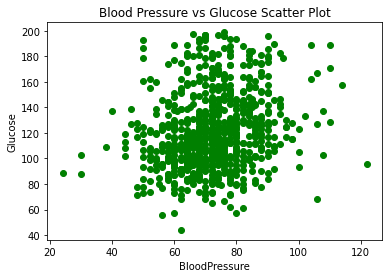

In [50]:
plt.scatter(BloodPressure, Glucose, color= 'g')
plt.xlabel('BloodPressure')
plt.ylabel('Glucose')
plt.title('Blood Pressure vs Glucose Scatter Plot') # can see the positive co-relation between the Blood Pressure and Glucose 

Text(0.5, 1.0, 'BMI vs Insulin Scatter Plot')

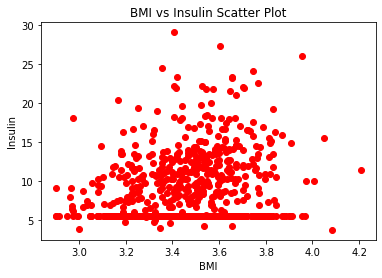

In [51]:
plt.scatter(BMI, Insulin, color= 'r')
plt.xlabel('BMI')
plt.ylabel('Insulin')
plt.title('BMI vs Insulin Scatter Plot') # low positive co-relation

Text(0.5, 1.0, 'BMI vs Glucose Scatter Plot')

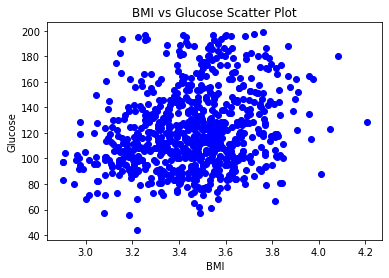

In [52]:
plt.scatter(BMI, Glucose, color= 'b')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.title('BMI vs Glucose Scatter Plot') # positive co-relation

Text(0.5, 1.0, 'Glucose vs Insulin Scatter Plot')

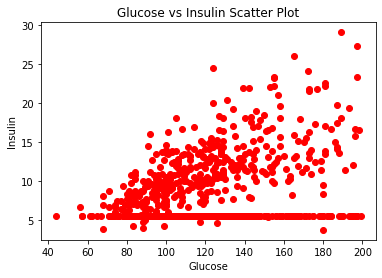

In [53]:
plt.scatter(Glucose, Insulin,  color= 'r')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.title('Glucose vs Insulin Scatter Plot') # positive co-relation

Text(0.5, 1.0, 'Scatter plot for between all variables')

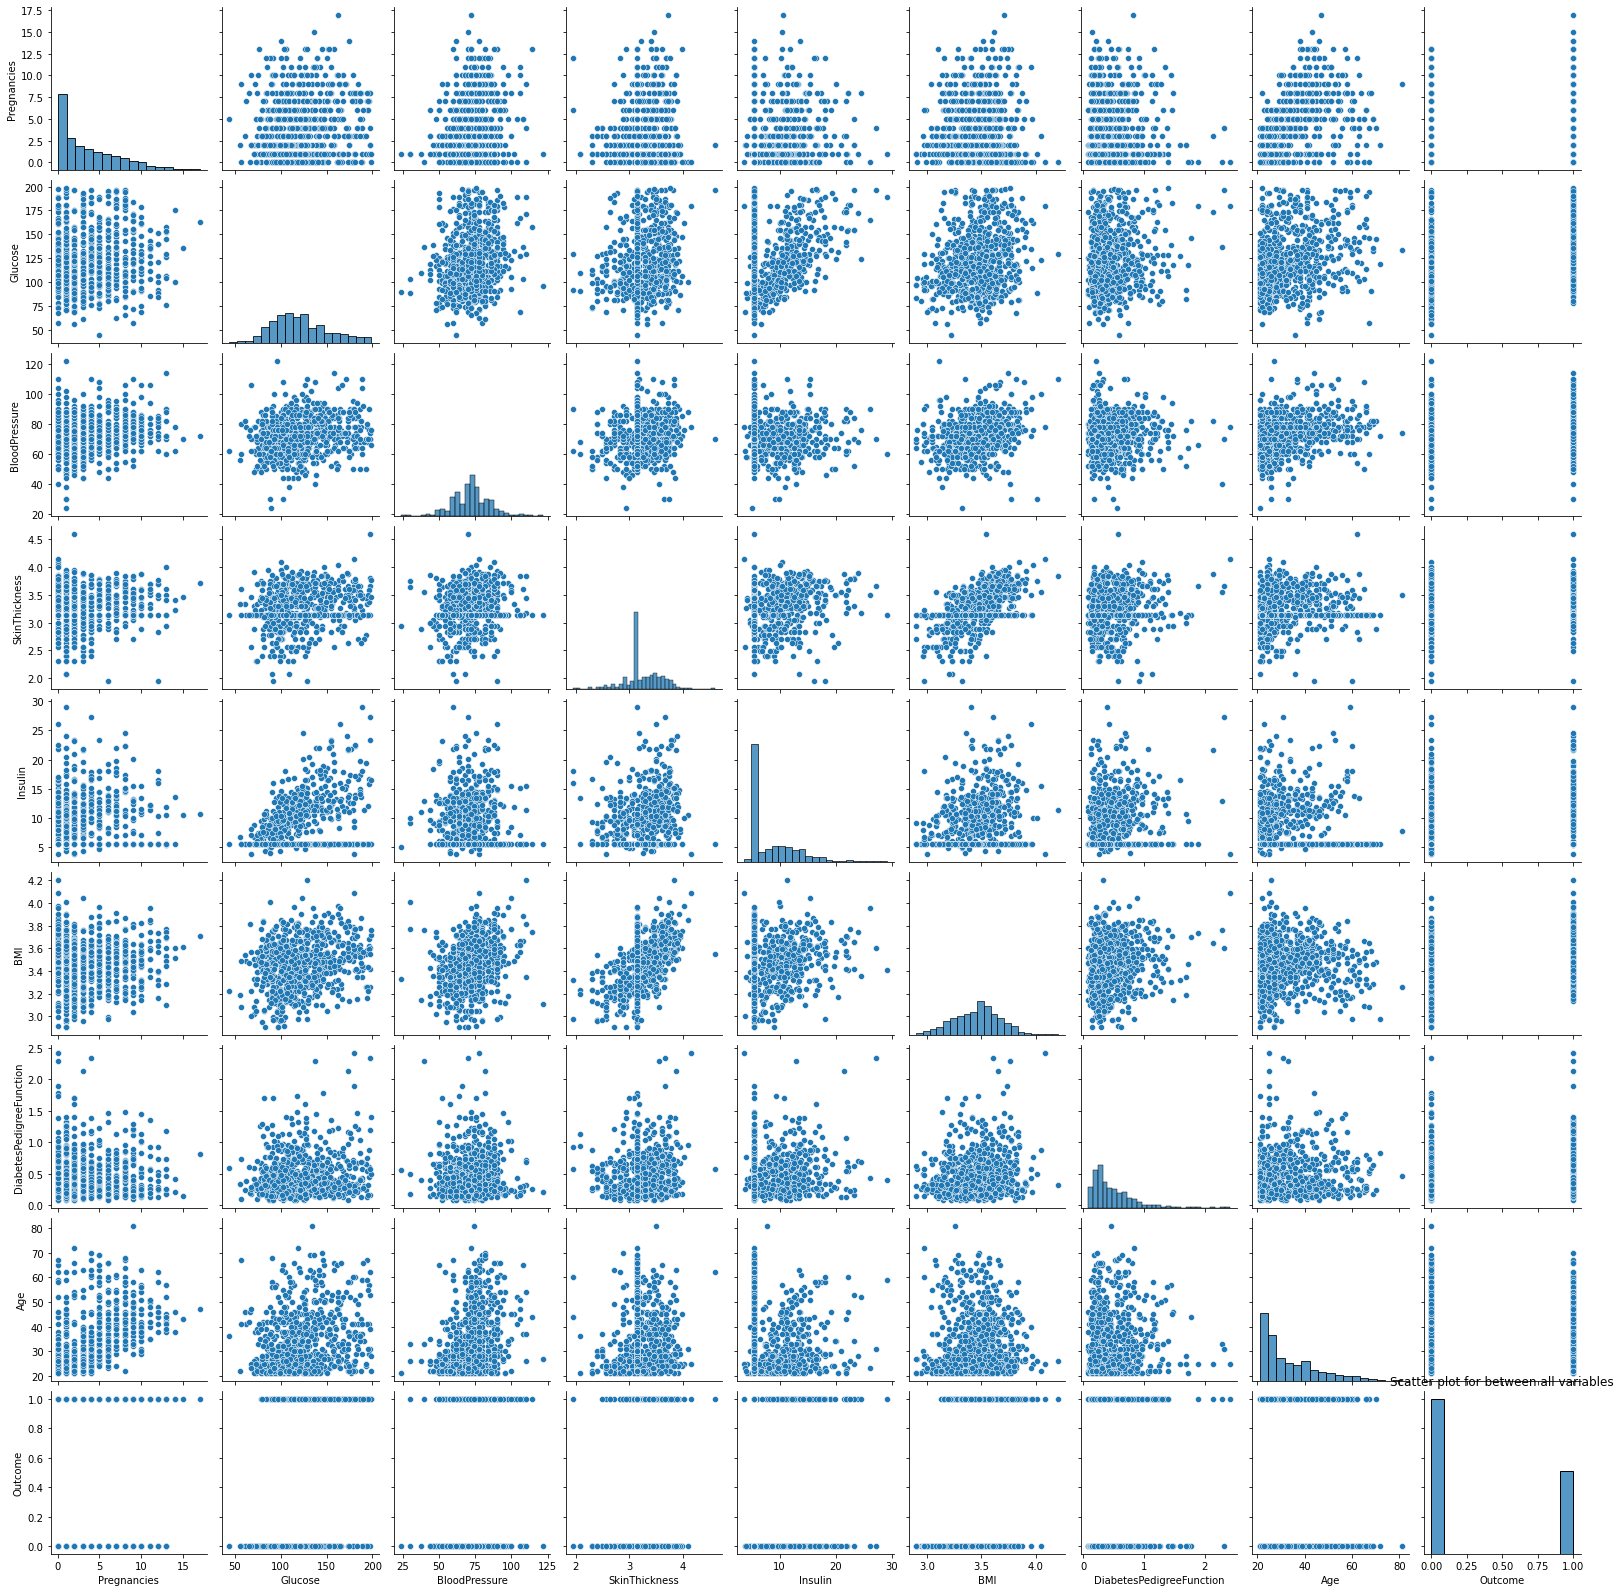

In [54]:
sns.pairplot(diabetesdata)
plt.title('Scatter plot for between all variables')

# Perform correlation analysis. Visually explore it using a heat map.

In [55]:
diabetesdata.corr() # Analysing the co-relation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.067406,-0.071495,0.042696,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.174054,0.332847,0.237822,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.160680,-0.047206,0.271618,-0.002378,0.324915,0.165723
SkinThickness,0.067406,0.174054,0.160680,1.000000,0.216784,0.563001,0.109056,0.074438,0.200185
Insulin,-0.071495,0.332847,-0.047206,0.216784,1.000000,0.200573,0.186575,-0.048277,0.136686
BMI,0.042696,0.237822,0.271618,0.563001,0.200573,1.000000,0.149000,0.039090,0.320871
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.109056,0.186575,0.149000,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.074438,-0.048277,0.039090,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.200185,0.136686,0.320871,0.173844,0.238356,1.000000


It clearly depicts that Glucose and BMI has good impact on outcome. There is a strong positive correlation between BMI and Skinthickness or Pregnancies and age

<AxesSubplot:>

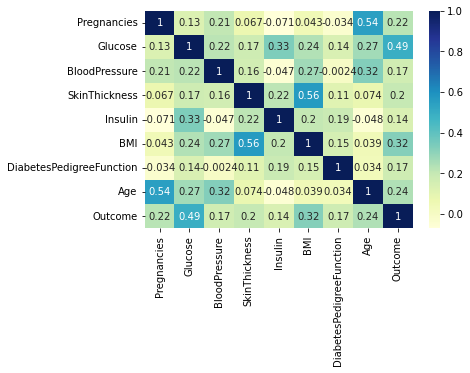

In [56]:
sns.heatmap(diabetesdata.corr(), cmap="YlGnBu", annot= True)

# Data Modeling:

Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. 

In [57]:
# seperating the features and labels into X and y variable
X = diabetesdata.iloc[:,0:8].values
y = diabetesdata.iloc[:,-1].values

In [58]:
X.shape

(768, 8)

In [59]:
X

array([[  6.        , 148.        ,  72.        , ...,   3.51452607,
          0.627     ,  50.        ],
       [  1.        ,  85.        ,  66.        , ...,   3.28091122,
          0.351     ,  31.        ],
       [  8.        , 183.        ,  64.        , ...,   3.14845336,
          0.672     ,  32.        ],
       ...,
       [  5.        , 121.        ,  72.        , ...,   3.26575941,
          0.245     ,  30.        ],
       [  1.        , 126.        ,  60.        , ...,   3.40452517,
          0.349     ,  47.        ],
       [  1.        ,  93.        ,  70.        , ...,   3.41444261,
          0.315     ,  23.        ]])

In [60]:
y.shape

(768,)

In [61]:
y = y.reshape(-1, 1)

In [62]:
# splitting data into train test split
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=42)

# Apply an appropriate classification algorithm to build a model.
# Compare various models with the results from KNN algorithm
# Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

   # Applying the logistic Regression Algorithm

In [64]:
# Applying the logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression

In [65]:
LR=LogisticRegression()

In [66]:
LR.fit(X_train,y_train)

LogisticRegression()

In [67]:
y_predict=LR.predict(X_test)

In [68]:
y_predict

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
      dtype=int64)

In [69]:
# printing training and testing accuracy 
print(LR.score(X_train,y_train))
print(LR.score(X_test,y_test))

0.745928338762215
0.7402597402597403


In [70]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[82, 17],
       [23, 32]], dtype=int64)

Model Validation ==>

Accuracy Score of Logistic Regression Model::
0.7402597402597403

 Classification Report::
              precision    recall  f1-score   support

           0       0.78      0.83      0.80        99
           1       0.65      0.58      0.62        55

    accuracy                           0.74       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154
 


 ROC Curve


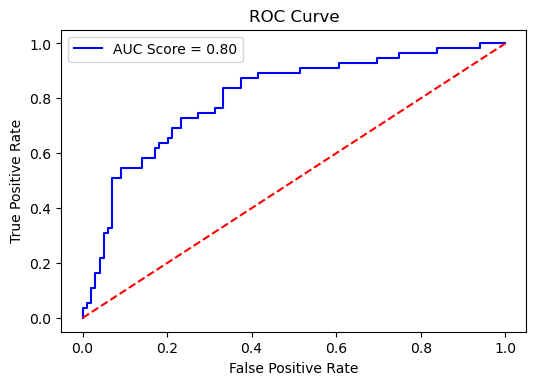

In [71]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

print("Model Validation ==>\n")
print("Accuracy Score of Logistic Regression Model::")
print(metrics.accuracy_score(y_test,y_predict))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,y_predict),'\n')
print("\n","ROC Curve")


y_predict =LR.predict_proba(X_test)
y_predict=y_predict[:, 1]


fpr,tpr,thresh=metrics.roc_curve(y_test,y_predict)
roc_auc=metrics.auc(fpr,tpr)
plt.figure(dpi=100)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

# Applying Decision Tree Algorithm

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
DTC=DecisionTreeClassifier()

In [74]:
DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [75]:
y_predict=DTC.predict(X_test)

In [76]:
print(DTC.score(X_train,y_train))
print(DTC.score(X_test,y_test)) # model is overfitted 

1.0
0.7142857142857143


Model Validation ===================>

Accuracy Score of Decision Tree Model::
0.7142857142857143

 Classification Report::
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        99
           1       0.59      0.65      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.70       154
weighted avg       0.72      0.71      0.72       154
 


 ROC Curve


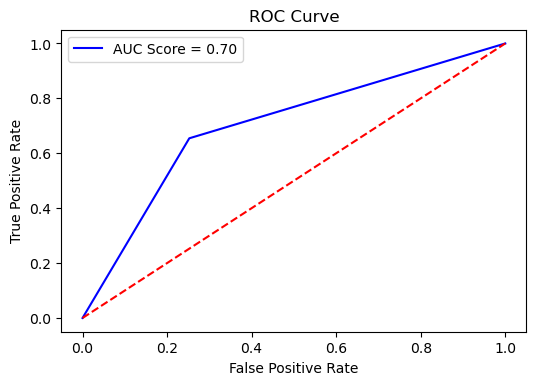

In [77]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

print("Model Validation ===================>\n")
print("Accuracy Score of Decision Tree Model::")
print(metrics.accuracy_score(y_test,y_predict))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,y_predict),'\n')
print("\n","ROC Curve")


y_predict =DTC.predict_proba(X_test)
y_predict=y_predict[:, 1]


fpr,tpr,thresh=metrics.roc_curve(y_test,y_predict)
roc_auc=metrics.auc(fpr,tpr)
plt.figure(dpi=100)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

# Applying Random Forest Algorithm

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
RFC = RandomForestClassifier()

In [80]:
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [81]:
print(RFC.score(X_train,y_train))
print(RFC.score(X_test,y_test)) # model is overfitted 

1.0
0.7467532467532467


In [82]:
y_predict=RFC.predict(X_test)

Model Validation ===================>

Accuracy Score of Random Forest Model::
0.7467532467532467

 Classification Report::
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154
 


 ROC Curve


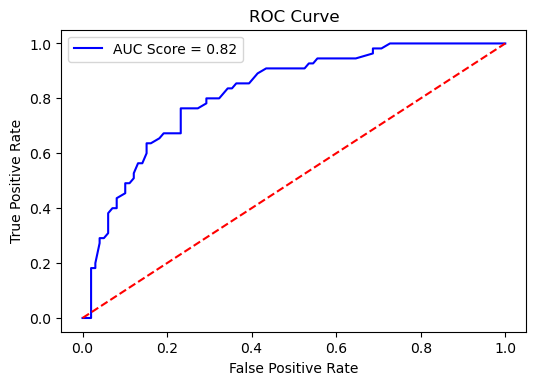

In [83]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

print("Model Validation ===================>\n")
print("Accuracy Score of Random Forest Model::")
print(metrics.accuracy_score(y_test,y_predict))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,y_predict),'\n')
print("\n","ROC Curve")


y_predict =RFC.predict_proba(X_test)
y_predict=y_predict[:, 1]


fpr,tpr,thresh=metrics.roc_curve(y_test,y_predict)
roc_auc=metrics.auc(fpr,tpr)
plt.figure(dpi=100)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

# Applying Gradient Boosting Classifier Algorithm

In [84]:
from sklearn.ensemble import GradientBoostingClassifier

In [85]:
GBC = GradientBoostingClassifier()

In [86]:
GBC.fit(X_train,y_train)

GradientBoostingClassifier()

In [87]:
y_predict=GBC.predict(X_test)

Model Validation ================================>

Accuracy Score of GradientBoostingClassifier Model::
0.7337662337662337

 Classification Report::
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        99
           1       0.61      0.71      0.66        55

    accuracy                           0.73       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.73      0.74       154
 


 ROC Curve


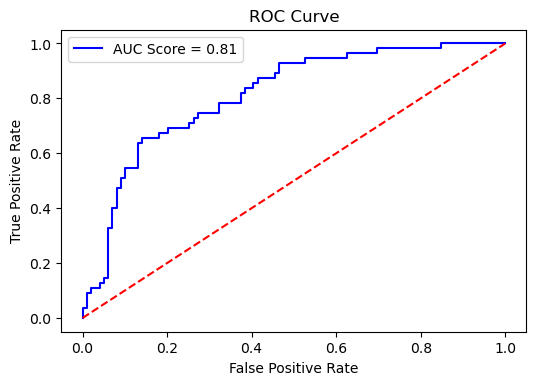

In [88]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

print("Model Validation ================================>\n")
print("Accuracy Score of GradientBoostingClassifier Model::")
print(metrics.accuracy_score(y_test,y_predict))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,y_predict),'\n')
print("\n","ROC Curve")


y_predict =GBC.predict_proba(X_test)
y_predict=y_predict[:, 1]


fpr,tpr,thresh=metrics.roc_curve(y_test,y_predict)
roc_auc=metrics.auc(fpr,tpr)
plt.figure(dpi=100)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

In [89]:
!pip install xgboost

# Applying XGBoost Algorithm

In [90]:
from xgboost import XGBClassifier

In [91]:
XGBC = XGBClassifier(base_score=0.50,learning_rate=0.2000000012, n_estimators=250)

In [92]:
XGBC.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2000000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=250,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [93]:
y_predict=XGBC.predict(X_test)

In [94]:
y_predict

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [95]:
print(XGBC.score(X_train,y_train))
print(XGBC.score(X_test,y_test))

1.0
0.7662337662337663


In [96]:
confusion_matrix(y_test, y_predict)

array([[77, 22],
       [14, 41]], dtype=int64)

Model Validation =============>

Accuracy Score of XGBoost Model::
0.7662337662337663

 Classification Report::
              precision    recall  f1-score   support

           0       0.85      0.78      0.81        99
           1       0.65      0.75      0.69        55

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.78      0.77      0.77       154
 


 ROC Curve


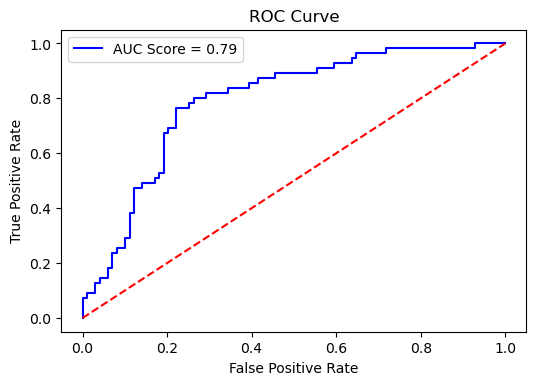

In [97]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

print("Model Validation =============>\n")
print("Accuracy Score of XGBoost Model::")
print(metrics.accuracy_score(y_test,y_predict))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,y_predict),'\n')
print("\n","ROC Curve")


y_predict =XGBC.predict_proba(X_test)
y_predict=y_predict[:, 1]


fpr,tpr,thresh=metrics.roc_curve(y_test,y_predict)
roc_auc=metrics.auc(fpr,tpr)
plt.figure(dpi=100)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

# Support Vector Classifier Algorithm

In [98]:
from sklearn.svm import SVC

In [99]:
SVC_model = SVC(kernel='linear',random_state=0,probability=True,C=0.01) 

In [100]:
SVC_model.fit(X_train,y_train)

SVC(C=0.01, kernel='linear', probability=True, random_state=0)

In [101]:
y_predict=SVC_model.predict(X_test)

Model Validation =========================>

Accuracy Score of Support Vector Machine Model::
0.7597402597402597

 Classification Report::
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        99
           1       0.70      0.58      0.63        55

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.75       154
 


 ROC Curve


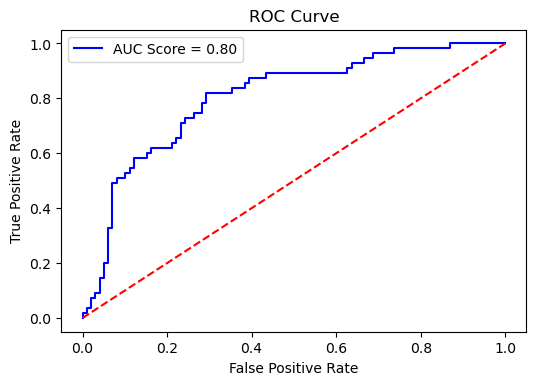

In [102]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

print("Model Validation =========================>\n")
print("Accuracy Score of Support Vector Machine Model::")
print(metrics.accuracy_score(y_test,y_predict))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,y_predict),'\n')
print("\n","ROC Curve")


y_predict =SVC_model.predict_proba(X_test)
y_predict=y_predict[:, 1]


fpr,tpr,thresh=metrics.roc_curve(y_test,y_predict)
roc_auc=metrics.auc(fpr,tpr)
plt.figure(dpi=100)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

In [103]:
print(SVC_model.score(X_train,y_train))
print(SVC_model.score(X_test,y_test))

0.745928338762215
0.7597402597402597


# K Nearest Neighbor classifier Algorithm

In [104]:
from sklearn.neighbors import KNeighborsClassifier

In [105]:
KNNC = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)

In [106]:
KNNC.fit(X_train,y_train)

KNeighborsClassifier()

In [107]:
y_predict=KNNC.predict(X_test)

In [108]:
y_predict

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [109]:
print(KNNC.score(X_train,y_train))
print(KNNC.score(X_test,y_test))

0.8208469055374593
0.7337662337662337


In [110]:
confusion_matrix(y_test, y_predict)

array([[81, 18],
       [23, 32]], dtype=int64)

Model Validation =========================>

Accuracy Score of KNeighborsClassifier Model::
0.7337662337662337

 Classification Report::
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        99
           1       0.64      0.58      0.61        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154
 


 ROC Curve


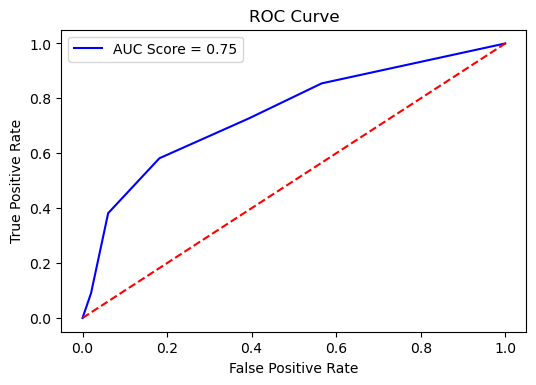

In [111]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

print("Model Validation =========================>\n")
print("Accuracy Score of KNeighborsClassifier Model::")
print(metrics.accuracy_score(y_test,y_predict))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,y_predict),'\n')
print("\n","ROC Curve")


y_predict =KNNC.predict_proba(X_test)
y_predict=y_predict[:, 1]


fpr,tpr,thresh=metrics.roc_curve(y_test,y_predict)
roc_auc=metrics.auc(fpr,tpr)
plt.figure(dpi=100)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

# Naive Bayes Algorithm

In [112]:
from sklearn.naive_bayes import GaussianNB

In [113]:
NB = GaussianNB()

In [114]:
NB.fit(X_train, y_train)

GaussianNB()

In [115]:
y_predict=NB.predict(X_test)

In [116]:
print(NB.score(X_train,y_train))
print(NB.score(X_test,y_test))

0.755700325732899
0.7402597402597403


Model Validation ==>

Accuracy Score of Naive Bayes Model::
0.7402597402597403

 Classification Report::
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        99
           1       0.62      0.69      0.66        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154
 


 ROC Curve


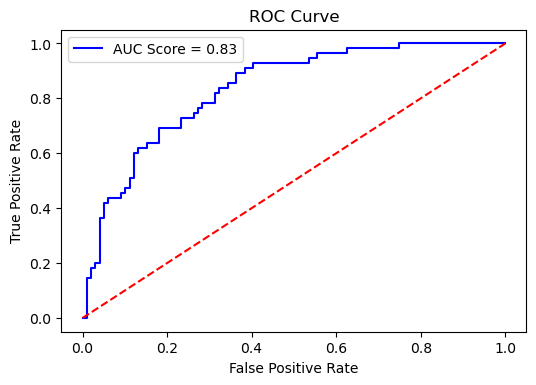

In [117]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

print("Model Validation ==>\n")
print("Accuracy Score of Naive Bayes Model::")
print(metrics.accuracy_score(y_test,y_predict))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,y_predict),'\n')
print("\n","ROC Curve")


y_predict =NB.predict_proba(X_test)
y_predict=y_predict[:, 1]


fpr,tpr,thresh=metrics.roc_curve(y_test,y_predict)
roc_auc=metrics.auc(fpr,tpr)
plt.figure(dpi=100)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

# XGBoost Random Forest Classifier Algorithm

In [118]:
from xgboost import XGBRFClassifier

In [119]:
XGBRFC = XGBRFClassifier()

In [120]:
XGBRFC.fit(X_train,y_train)

XGBRFClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                colsample_bylevel=1, colsample_bytree=1,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
                importance_type=None, interaction_constraints='', max_bin=256,
                max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
                max_leaves=0, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=0,
                num_parallel_tree=100, objective='binary:logistic',
                predictor='auto', random_state=0, reg_alpha=0,
                sampling_method='uniform', scale_pos_weight=1, ...)

In [121]:
print(XGBRFC.score(X_train,y_train))
print(XGBRFC.score(X_test,y_test))

0.8876221498371335
0.7532467532467533


In [122]:
y_predict=XGBRFC.predict(X_test)

Model Validation ==>

Accuracy Score of XGBoost RandomForest Classifier Model::
0.7532467532467533

 Classification Report::
              precision    recall  f1-score   support

           0       0.83      0.78      0.80        99
           1       0.64      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154
 


 ROC Curve


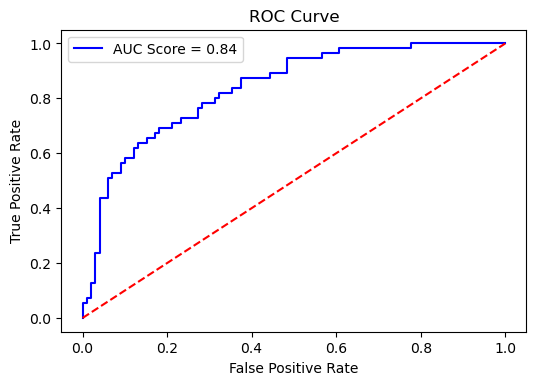

In [123]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

print("Model Validation ==>\n")
print("Accuracy Score of XGBoost RandomForest Classifier Model::")
print(metrics.accuracy_score(y_test,y_predict))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,y_predict),'\n')
print("\n","ROC Curve")


y_predict =XGBRFC.predict_proba(X_test)
y_predict=y_predict[:, 1]


fpr,tpr,thresh=metrics.roc_curve(y_test,y_predict)
roc_auc=metrics.auc(fpr,tpr)
plt.figure(dpi=100)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

In [124]:
# checking the Cross val score of Naive Bayes model

In [125]:
from sklearn.model_selection import cross_val_score

In [126]:
NB_CV=cross_val_score(NB,X_train,y_train,cv=10) # considering 10 model

In [127]:
NB_CV

array([0.70967742, 0.72580645, 0.87096774, 0.69354839, 0.75409836,
       0.78688525, 0.73770492, 0.70491803, 0.78688525, 0.68852459])

In [128]:
NB_CV.mean()

0.7459016393442623

# Additional Work

In [129]:
# trying different models at once (StackEnsemble Models)

from sklearn.model_selection import KFold
models=[]
scoring='accuracy'
models.append(("LR",LogisticRegression(max_iter=1000)))
models.append(("SVC", SVC()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("NaiveBayes",GaussianNB()))
models.append(("DecisionTree", DecisionTreeClassifier()))
models.append(("RandomForest",RandomForestClassifier()))
models.append(("GradientBoosting",GradientBoostingClassifier()))
models.append(("XGBoost",XGBClassifier()))
models.append(("XGBoost RandomForest",XGBRFClassifier()))

results=[]
names=[]

for name, model in models:
    kfold=KFold(n_splits=10)
    cv_results= cross_val_score(model,X,y,cv=kfold,scoring=scoring)
    
    results.append(cv_results)
    names.append(name)
    message="%s: %f (%f)" %(name,cv_results.mean(),cv_results.std())
    print(message)

LR: 0.768267 (0.052056)
SVC: 0.748718 (0.062789)
KNN: 0.735783 (0.060815)
NaiveBayes: 0.748753 (0.046198)
DecisionTree: 0.680895 (0.074461)
RandomForest: 0.762919 (0.058609)
GradientBoosting: 0.760373 (0.059195)
XGBoost: 0.737030 (0.048309)
XGBoost RandomForest: 0.760373 (0.068224)


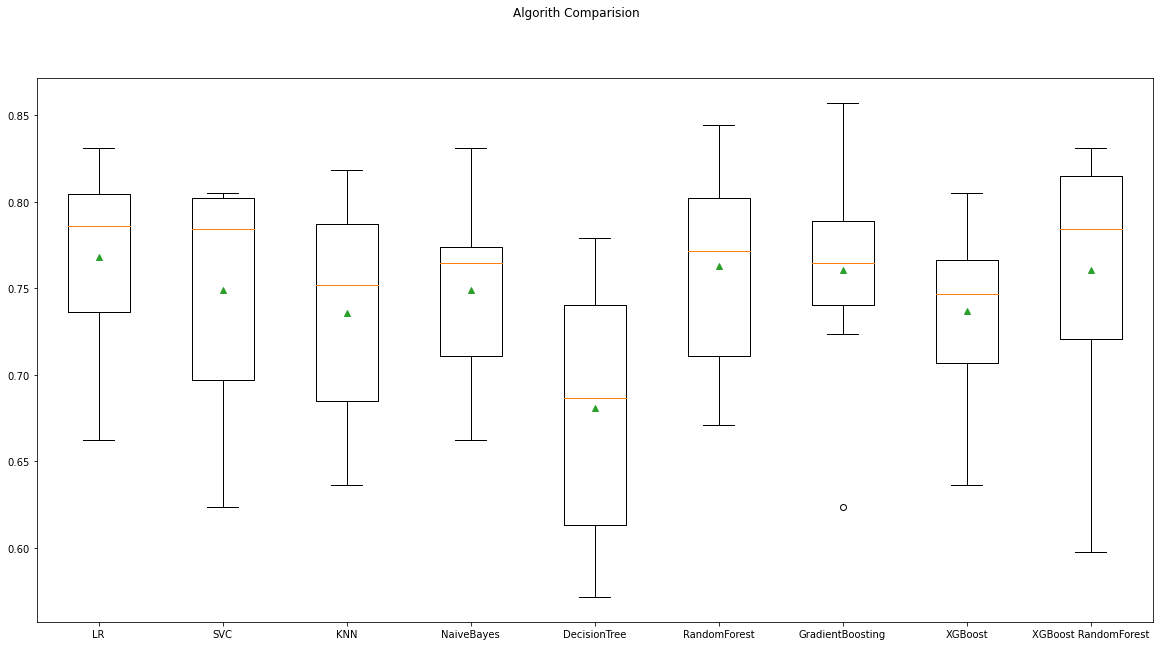

In [130]:
# plotting graph for the comparision of different algorithms
fig=plt.figure(figsize=(20,10))
fig.suptitle("Algorith Comparision")
ax=fig.add_subplot(111)
plt.boxplot(results, showmeans=True)
ax.set_xticklabels(names)
plt.show()

In [131]:
# Here can clearly see the logistic regression, Random forest and GradientBoosting and XGBoost Random Forest perform nearly 
# same though these algorithms performs better than rest of the algorithms.
# Also if consider AUC then XG Boost Random Forest Algoritms works better than others. 